<a href="https://colab.research.google.com/github/ikechi01/ikechi01/blob/main/ikechi_io_A_B_Test_Project_Synthetic_take_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**: Simulate user behavior before and after introducing a feature.

**Metrics to Track**: Sessions, conversions, time spent, click-through rate (CTR), etc.

**Groups**: A (control group) and B (test group with the feature).

In [1]:
import pandas as pd
import numpy as np

# Parameters
n_users = 1000
control_mean_duration = 8  # Average session duration for Group A
test_mean_duration = 10    # Average session duration for Group B
conversion_rate_control = 0.1
conversion_rate_test = 0.15

# Assign users to groups
np.random.seed(42)
user_ids = range(1, n_users + 1)
groups = np.random.choice(['A', 'B'], size=n_users, p=[0.5, 0.5])

# Generate session durations
session_durations = [
    np.random.normal(control_mean_duration, 2) if group == 'A' else
    np.random.normal(test_mean_duration, 2)
    for group in groups
]

# Generate conversions
conversions = [
    np.random.rand() < conversion_rate_control if group == 'A' else
    np.random.rand() < conversion_rate_test
    for group in groups
]

# Create DataFrame
data = pd.DataFrame({
    'user_id': user_ids,
    'group': groups,
    'session_duration': session_durations,
    'conversion': conversions
})

# Add timestamps
data['timestamp'] = pd.date_range(start='2024-01-01', periods=n_users, freq='T')

# Save to CSV (optional)
data.to_csv('synthetic_ab_test_data.csv', index=False)

print(data.head())


   user_id group  session_duration  conversion           timestamp
0        1     A          8.355402       False 2024-01-01 00:00:00
1        2     B          7.329311       False 2024-01-01 00:01:00
2        3     B         10.760396       False 2024-01-01 00:02:00
3        4     B         11.221171       False 2024-01-01 00:03:00
4        5     A          9.119581       False 2024-01-01 00:04:00


<ipython-input-1-c04d2ea3aa68>:39: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data['timestamp'] = pd.date_range(start='2024-01-01', periods=n_users, freq='T')


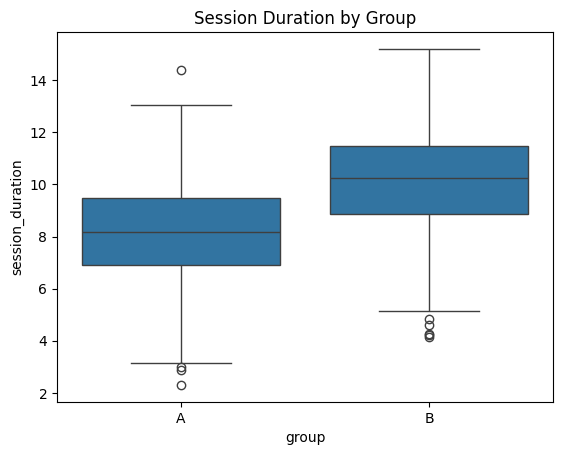

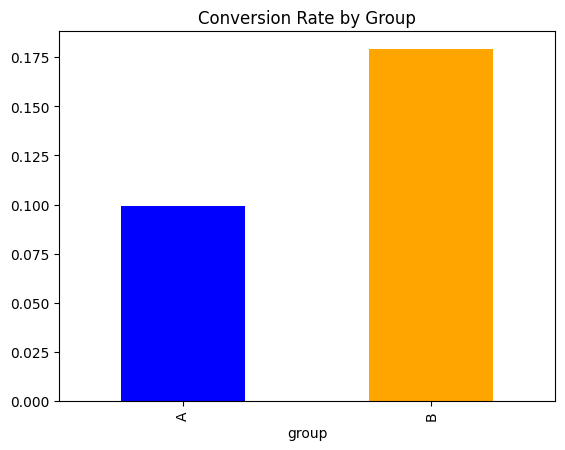

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot session durations by group
sns.boxplot(x='group', y='session_duration', data=data)
plt.title('Session Duration by Group')
plt.show()

# Plot conversion rates
conversion_rates = data.groupby('group')['conversion'].mean()
conversion_rates.plot(kind='bar', title='Conversion Rate by Group', color=['blue', 'orange'])
plt.show()


In [3]:
from scipy.stats import ttest_ind

group_a = data[data['group'] == 'A']['session_duration']
group_b = data[data['group'] == 'B']['session_duration']

# T-test for session duration
t_stat, p_value = ttest_ind(group_a, group_b)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Compare conversion rates
conversion_a = data[data['group'] == 'A']['conversion']
conversion_b = data[data['group'] == 'B']['conversion']
conversion_rate_a = conversion_a.mean()
conversion_rate_b = conversion_b.mean()

print(f"Conversion Rate - Group A: {conversion_rate_a:.2%}")
print(f"Conversion Rate - Group B: {conversion_rate_b:.2%}")


T-Statistic: -15.425846443696509, P-Value: 2.5985100347526512e-48
Conversion Rate - Group A: 9.94%
Conversion Rate - Group B: 17.91%


                   user_id  session_duration
user_id           1.000000         -0.031848
session_duration -0.031848          1.000000


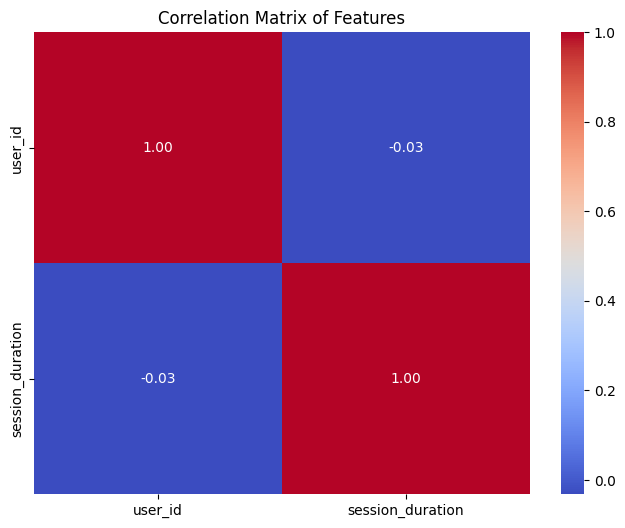

In [5]:
# Calculate the correlation matrix for numerical features only
correlation_matrix = data.select_dtypes(include=np.number).corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()